In [44]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

## Intro

1. Submit this task as a Jupyter Notebook (.ipynb file) downloaded from your team's Google Colab. Make sure you made a copy of this notebook and opened it via UCU email address.

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.  

4. Provide a **work breakdown** structure estimating the efforts of each team member. Please provide it at the top of your notebook.  

5. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

6. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **resizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!

7. The final deadline is **February 27 2024, 23:59**. If you submit your assignment after this time and date, it will not be graded.




#### Work breakdown (example):

Kukurik Pavlo: task 1.1-1.4

Ivanyshyn Igor:  task 1.5-1.6

Dynia Anastasiia: task 2


## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is (500, 500, 3)


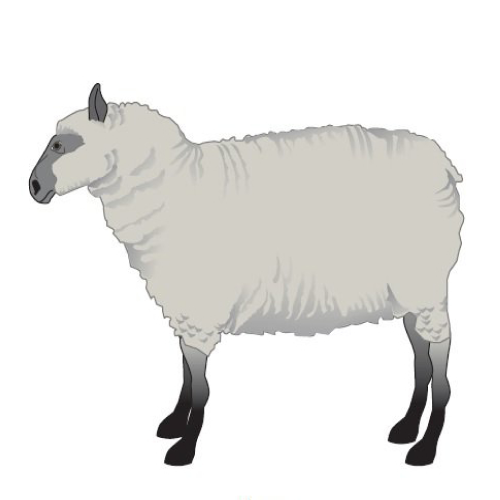

In [45]:
# Load images

##### YOUR CODE STARTS #####

img1_path = './sheep.png'
image = cv.imread(img1_path)
resized = cv.resize(image, (500,500))

print(f"The shape of the image is {resized.shape}")
cv2_imshow(resized)

##### YOUR CODE ENDS #####

 What is this image's shape? What do the values mean?

The shape of the image is (500, 500, 3), where the first two numbers represent height(500) and width(500) of the image in pixels, and the third number means 3 colour channels that our RGB image has: red, green and blue.

### 1.2 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
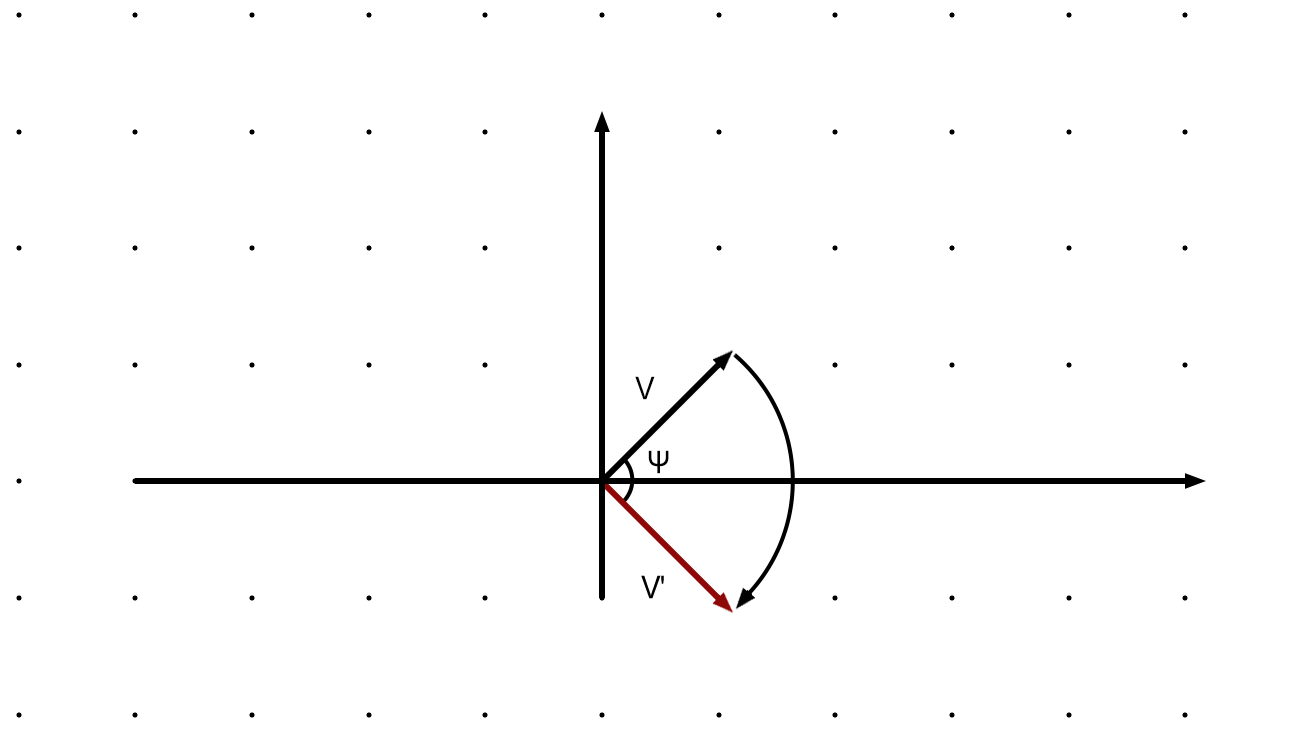

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?

$\begin{pmatrix}\cos(\phi)&-sin(\phi)\\\sin(\phi)&\cos(\phi)\end{pmatrix}$

Also, we need to add one column to be able to shift our image if the origin has changed its' position.

Let denote our center by $c_0$, transformation matrix by $A$ and vector that corresponds for shifting by $B$.
$$c_0 = \begin{pmatrix}
x_c \\
y_c
\end{pmatrix}$$

$$ Ac_0 + B = c_0 $$

$$ B = c_0 - Ac_0$$


$$A*c_0 = \begin{pmatrix}\cos(\phi)&-sin(\phi)\\\sin(\phi)&\cos(\phi)\end{pmatrix}\begin{pmatrix}x_c\\y_c\end{pmatrix}=\begin{pmatrix}\cos(\phi)*x_c-sin(\phi)*y_c\\\sin(\phi)*x_c+cos(\phi)*y_c\end{pmatrix}
$$

Now, $$ B= \begin{pmatrix}x_c(1-cos(\phi))+y_c*sin(\phi)\\-x_c*sin(\phi)+y_c(1-cos(\phi))\end{pmatrix}
$$


Your next task is to implement a function that calculates the rotation matrix and apply it to a vector to rotate it by $45^\circ$.
First, construct the rotation matrix:

In [46]:
# Create rotation matrix

def get_rotation_matrix(phi, center=(0,0)):
    angle_rad = np.deg2rad(phi)

    alpha = np.cos(angle_rad)
    beta = np.sin(angle_rad)
    rot_matrix = np.array([
        [alpha, -beta, (1 - alpha) * center[0] + beta * center[1]],
        [beta, alpha, -beta * center[0] + (1 - alpha) * center[1]]
    ])
    return rot_matrix

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Rotation matrix is
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


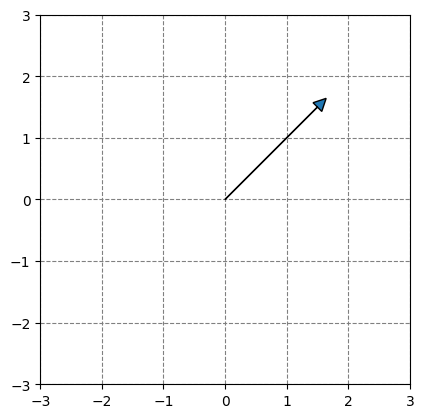

In [47]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

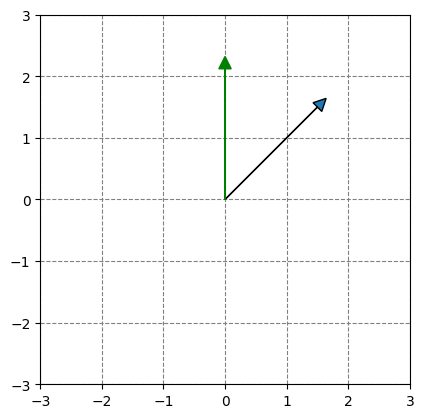

In [48]:
# Apply rotation to the vector AB1 to get vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])
M_ = M[:, :-1]
B2 = np.dot(M_, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! There is image rotated by 45 degrees. Rotate it back with transformation matrix, so it will look like **sheep.png**:

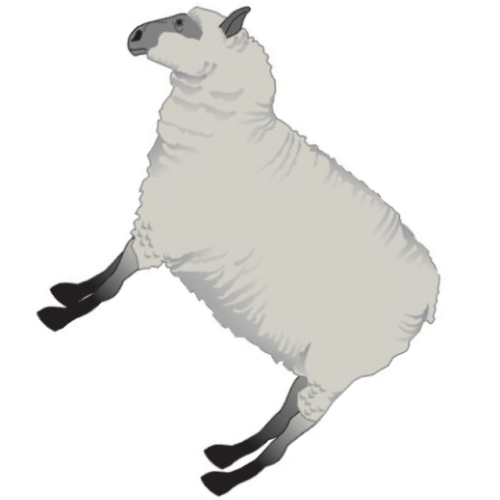

In [49]:
rotated_img = cv.imread("./rotated_sheep.png")
cv2_imshow(rotated_img)

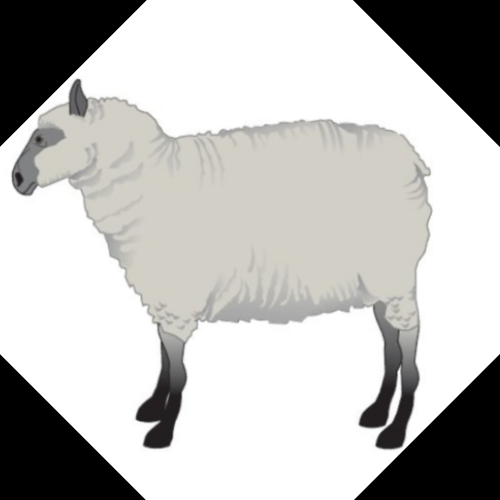

In [50]:
##### YOUR CODE STARTS #####
height, width, channels = image.shape

center_x = width // 2
center_y = height // 2

M_extended = get_rotation_matrix(-45, (center_x, center_y))
##### YOUR CODE ENDS #####
restored_img = cv.warpAffine(rotated_img, M_extended, (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(restored_img)

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
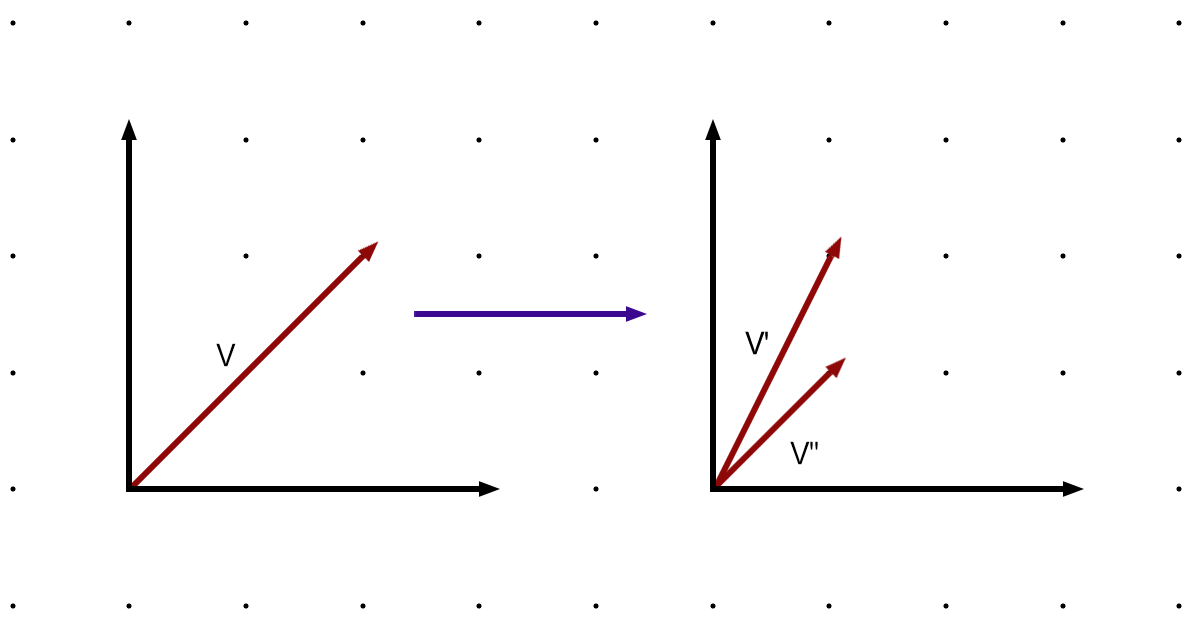

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector. First, explain how you derive the scaling matrix:

To create a scaling matrix, we multiply each coordinate of a vector by scaling factors $ s_x $ and $s_y$.

Suppose we have a vector with coordinates $ (x_1, y_1) $ and we need to scale it, getting a vector $ (s_x*x_1, s_y*y_1) $
$$
\begin{cases}
x_1 = a\\
y_1 = b
\end{cases}
$$

Then, if scaling our coordinates, we will get:

$$
\begin{cases}
x_2 = s_x * x_1 + 0 * y_1  \\
y_2 = 0 * x_1 + s_y * y_1
\end{cases}
$$

So, the scaling matrix has the form:

\begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix}

For scaling by (1, 0.5), the matrix is:

\begin{bmatrix}
1 & 0 \\
0 & 0.5
\end{bmatrix}

After scaling, the x-coordinate remains unchanged, while the y-coordinate is halved.

In [51]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.array([[scale_factor_x, 0], [0, scale_factor_y]])

M2 = get_scaling_matrix(1, 0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

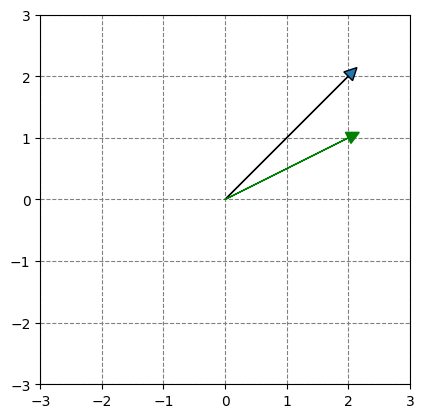

In [52]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
B2 = np.dot(M2, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by some factor to the image (scaled by a factor of (1, 0.5) before) to restore the **sheep.png**:

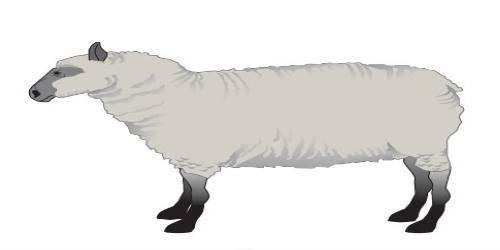

In [53]:
scaled_img = cv.imread("./scaled_sheep.png")
cv2_imshow(scaled_img)

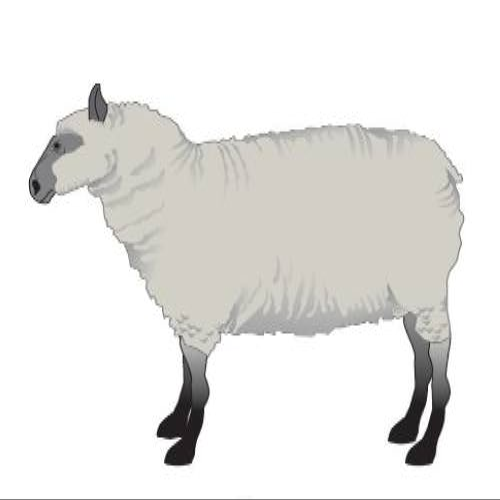

In [54]:
##### YOUR CODE STARTS #####
matrix = get_scaling_matrix(1, 2)
restored_img = cv.warpAffine(scaled_img, np.column_stack((matrix, [0.0,0.0] )), (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you needs to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector and the image. First, explain how do you build a matrix that corresponds to a shearing transformation:

To build a shearing matrix for a transformation that moves the point (x, y) to (x + 1.5y, y), we consider the shear matrix:

\begin{bmatrix}
1 & k \\
0 & 1
\end{bmatrix}

To achieve the desired transformation where the x-coordinate is shifted by 1.5 times the y-coordinate, we set k = 1.5

So, the shearing matrix becomes:

\begin{bmatrix}
1 & 1.5 \\
0 & 1
\end{bmatrix}

This matrix, when applied to a vector [x, y], results in the transformed vector [x + 1.5y, y].

To apply this shearing transformation to an image, we use the same matrix with an additional column for translation if needed.



Second, implement a function for constructing such a matrix:

In [55]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):
  return np.array([[1, factor], [0, 1]])

M3 = get_horizontal_shear_matrix(1.5)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


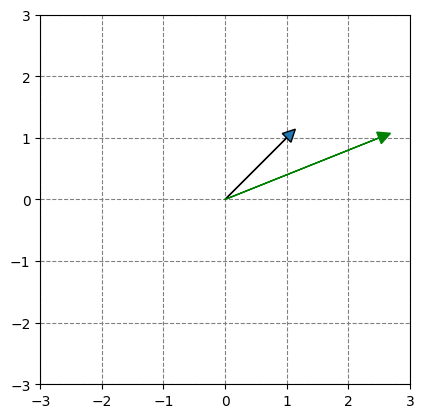

In [56]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M3, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image to restore **sheep.png**.

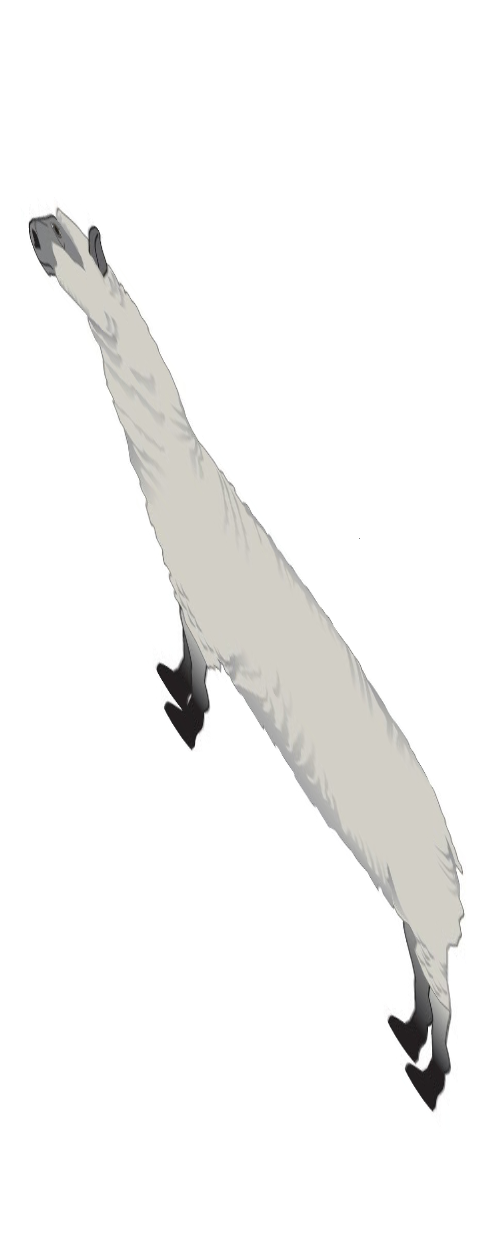

In [57]:
sheared_img = cv.imread("./sheared_sheep.png")
cv2_imshow(sheared_img)

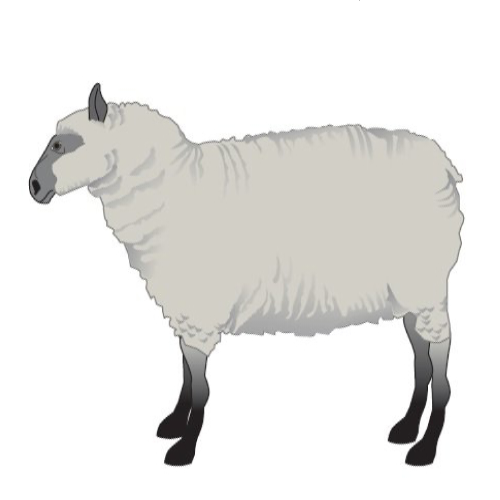

In [58]:
##### YOUR CODE STARTS #####
matr_sh = get_horizontal_shear_matrix(-1.5)

# swapped elements stored at [0,1] and [1,0] position to apply vertical shearing
temp = matr_sh[0, 1]
matr_sh[0, 1] = matr_sh[1, 0]
matr_sh[1, 0] = temp


restored_img = cv.warpAffine(sheared_img, np.column_stack((matr_sh, [0.0,0.0] )), (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


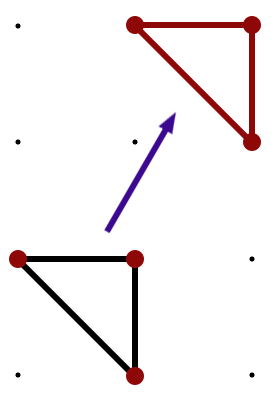

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector. Start from explaining how to construct a translation matrix:

A translation matrix is used to shift the position of points or objects in a coordinate system. It allows us to move points by adding constant values to their coordinates.

The general form of a 2D translation matrix is:

\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}

Here, $ t_x $ and $ t_y $ represent the translation distances along the x and y axes, respectively.

To apply a translation by \( 20, 25 \) to a vector \[x, y]\, we use the translation matrix:

\begin{bmatrix}
1 & 0 & 20 \\
0 & 1 & 25 \\
0 & 0 & 1
\end{bmatrix}

This matrix shifts the x-coordinate of the vector by 20 units and the y-coordinate by 25 units while leaving the z-coordinate unchanged.

Then, implement a function that produces such a matrix:

In [59]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
    translation_matrix = np.array([
        [1, 0, translation_factor_x],
        [0, 1, translation_factor_y]
    ], dtype=np.float32)

    return translation_matrix
M4 = get_translation_matrix(20, 25)
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]]


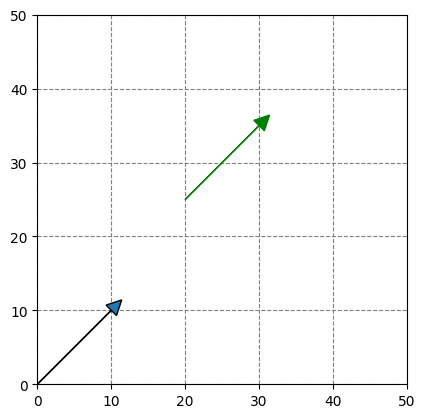

In [60]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0, 1])
B1 = np.array([10, 10, 1])
A2 = np.dot(M4, A1)
B2 = np.dot(M4, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation to the image (translated by (20, 25) before) to restore **sheep.png**.






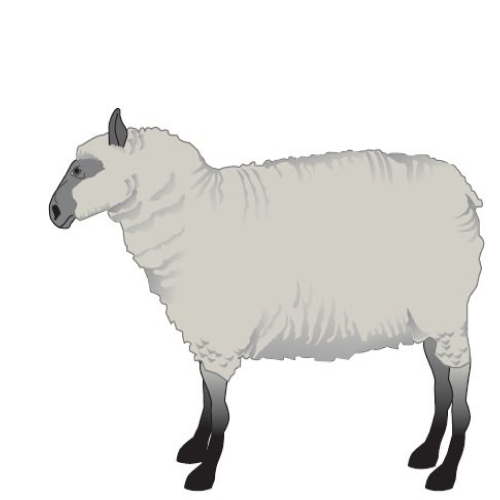

In [61]:
translated_img = cv.imread("./translated_sheep.png")
cv2_imshow(translated_img)

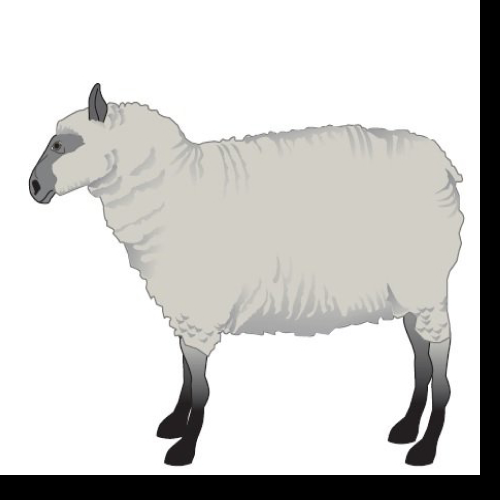

In [62]:
##### YOUR CODE STARTS #####
# Assuming you've defined get_translation_matrix function properly
m_trnsl = get_translation_matrix(-20, -25)
restored_img = cv.warpAffine(translated_img, m_trnsl, (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.6 Mirror symmetry
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

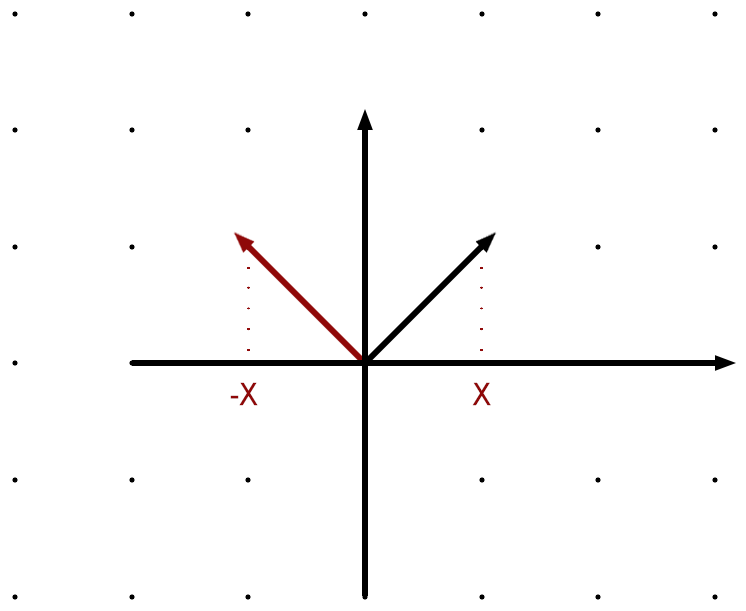

As in the previous parts, you need to provide the expanation, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

A vertical symmetry matrix is used to reflect points or objects across a vertical axis. It allows us to create a mirror image of the original object.

The general form of a 2D vertical symmetry matrix is:

\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}

The element -1 in the first row indicates the reflection across the vertical axis.



In [63]:
##### YOUR CODE STARTS #####
def get_horizontal_mirror_marix(width=0):
    mirror_matrix = np.array([
        [-1, 0, width],
        [0, 1, 0]
    ], dtype=np.float32)

    return mirror_matrix
M5 = get_horizontal_mirror_marix()
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[-1.  0.  0.]
 [ 0.  1.  0.]]


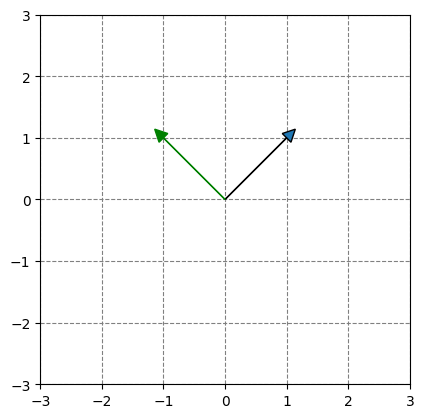

In [64]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0,0])
B1 = np.array([1, 1])
M_5 = M5[:, :-1]
B2 = np.dot(M_5, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Apply a vertical symmetry matrix to restore **sheep.png**.

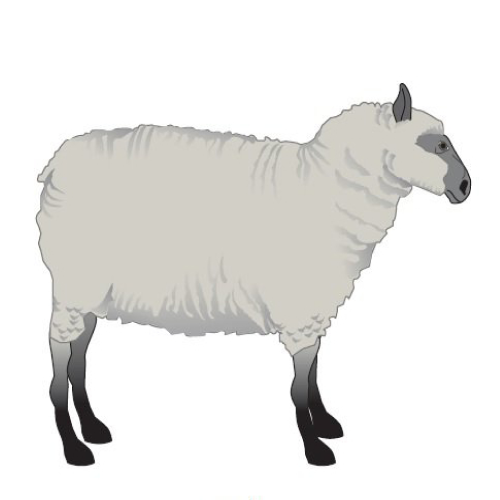

In [65]:
mirrored_img = cv.imread("./mirrored_sheep.png")
cv2_imshow(mirrored_img)

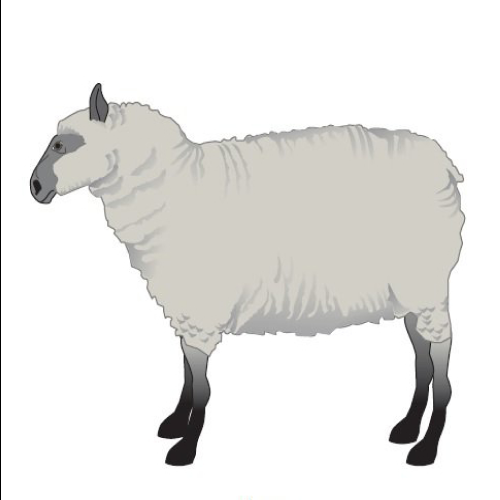

In [66]:
##### YOUR CODE STARTS #####
M5_extended = get_horizontal_mirror_marix(500)
restored_img = cv.warpAffine(mirrored_img, M5_extended , (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

## 2.

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

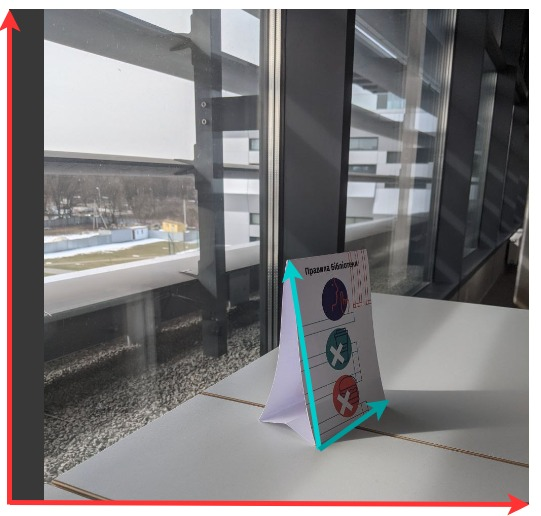

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear).In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible.
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

So, we have the following 2 equations: \

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

Now, if we multiply both sides in each equation by ${c_{20}*x_i + c_{21}*y_i + c_{22}}$, we will have the following:

$({c_{20}*x_i + c_{21}*y_i + c_{22}})*u_i={c_{00}*x_i + c_{01}*y_i + c_{02}}$

$({c_{20}*x_i + c_{21}*y_i + c_{22}})*v_i={c_{10}*x_i + c_{11}*y_i + c_{12}}$

After opening the brackets and substituting $c_{22}$ with 1, the following holds:

${c_{00}*(-x_i) + c_{01}* (-y_i) + c_{02}*(-1)+c_{10}*0 + c_{11}*0 + c_{12}*0}+{c_{20}*x_i*u_i + c_{21}*y_i*u_i }=-u_i$

${c_{00}*0 + c_{01}* 0 + c_{02}*0+c_{10}*(-x_i) + c_{11}*(-y_i) + c_{12}*(-1)}+{c_{20}*x_i*v_i + c_{21}*y_i*v_i }=-v_i$

Now, rewriting our equations as a multiplying of matrices, we get:
\begin{equation*}
\begin{pmatrix}
-x_i & -y_i & -1 & 0 & 0 & 0 & x_i u_i & y_i u_i \\
0 & 0 & 0 & -x_i & -y_i & -1 & x_i v_i & y_i v_i
\end{pmatrix}
\begin{pmatrix}
c_{00} \\
c_{01} \\
c_{02} \\
c_{10} \\
c_{11} \\
c_{12} \\
c_{20} \\
c_{21}
\end{pmatrix}
=
\begin{pmatrix}
-u_i \\
-v_i
\end{pmatrix}
\end{equation*}

Now, we need to solve our system of linear equations(we will do it, using python library).

Next, prepare the second image:

The shape of the image is (1280, 960, 3)


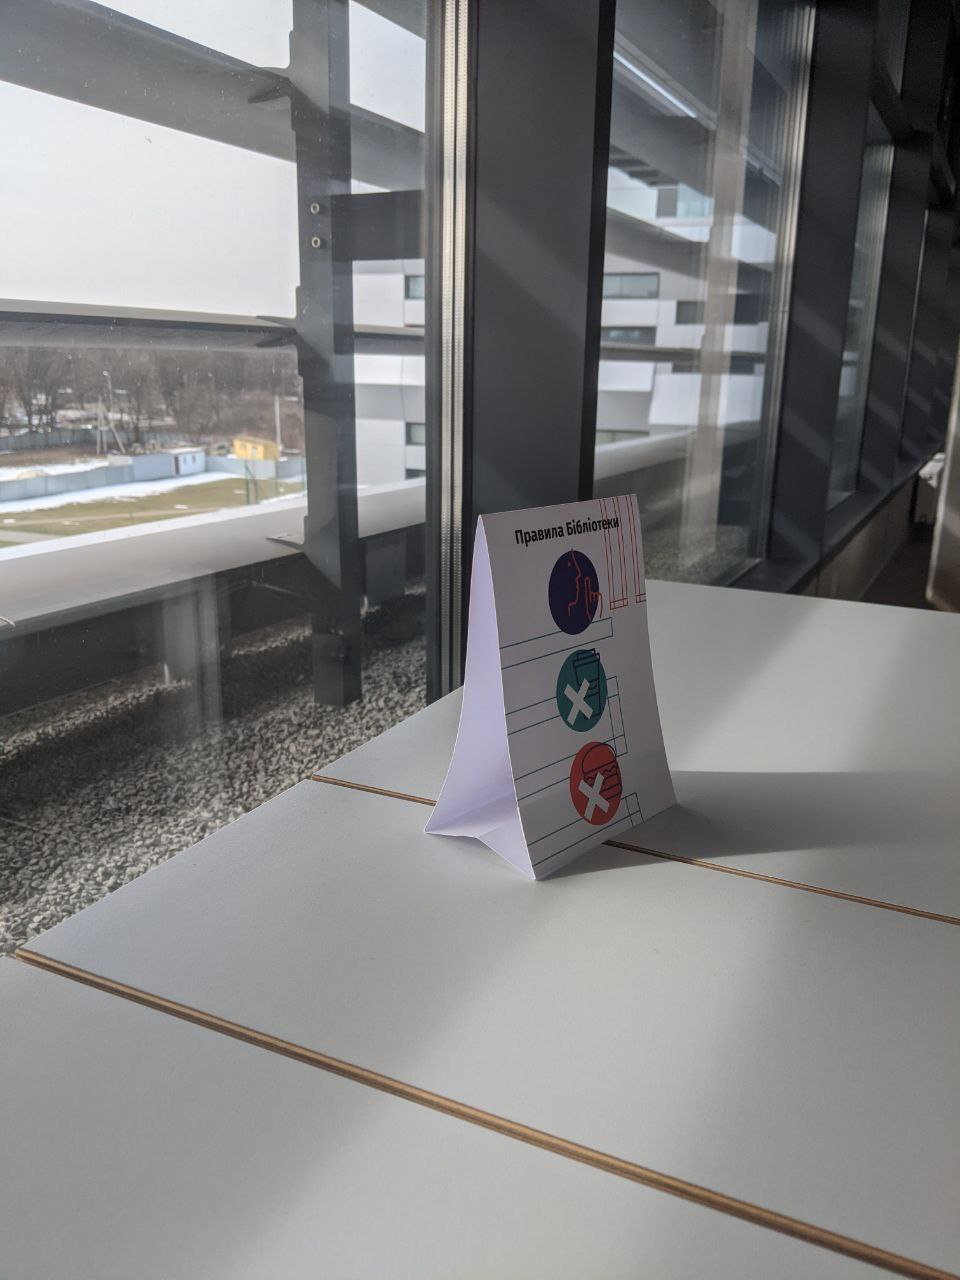

In [67]:
##### YOUR CODE STARTS #####
img2_path = './img2.jpg'
##### YOUR CODE ENDS #####
image2 = cv.imread(img2_path)
print(f"The shape of the image is {image2.shape}")
cv2_imshow(image2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

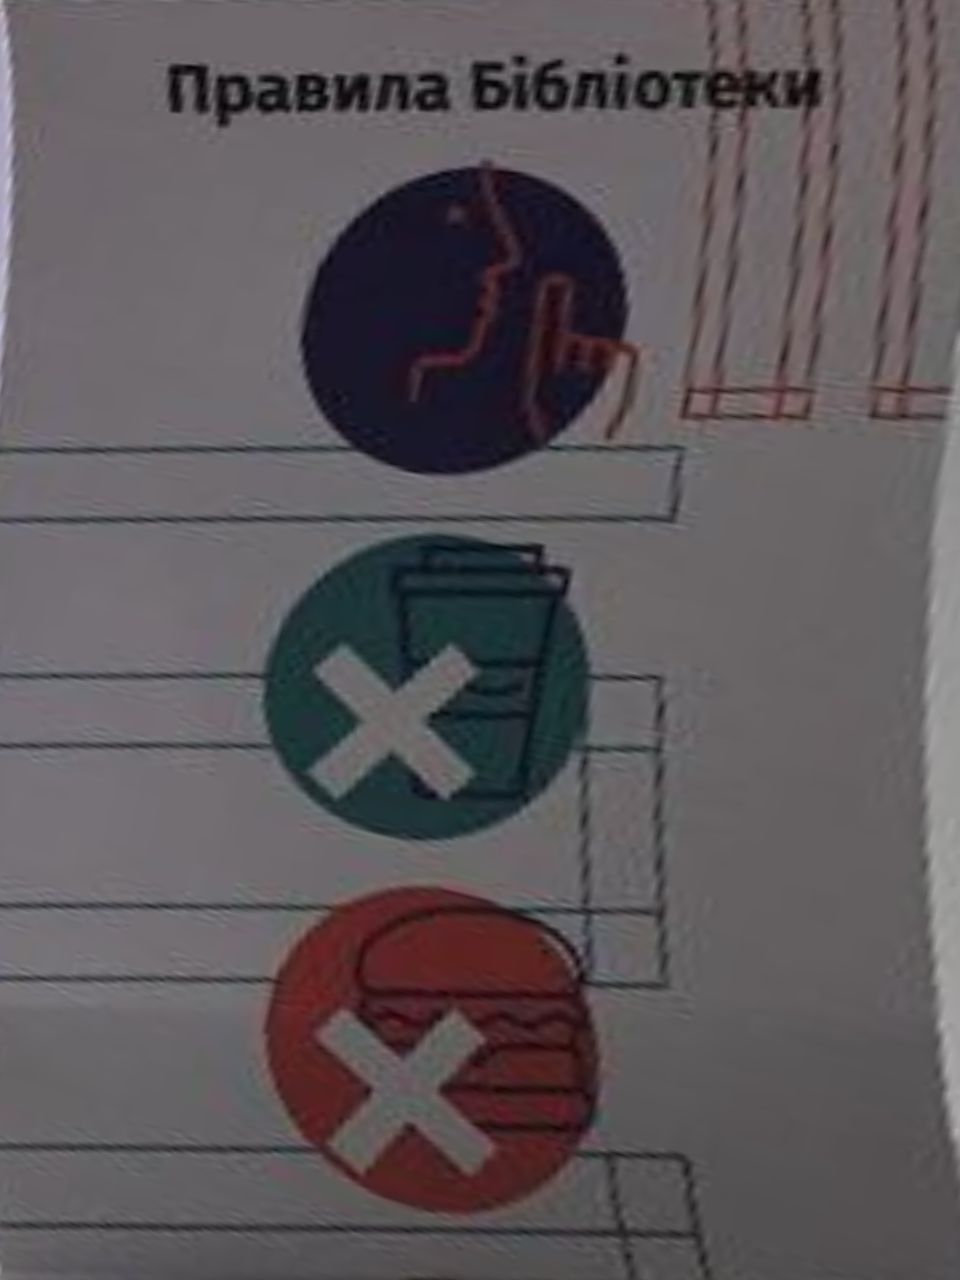

In [68]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source, destination):
  i = 0
  A = []
  b = []
  for i in range(len(source)):
    x_i, y_i  = source[i]
    u_i, v_i = destination[i]
    A.append([-1*x_i, -1*y_i, -1, 0, 0, 0, x_i*u_i, y_i*u_i])
    A.append([0, 0, 0, -1*x_i, -1*y_i, -1, x_i*v_i, y_i*v_i])
    b.append(-1*u_i)
    b.append(-1*v_i)

    c = np.linalg.lstsq(A, b, rcond=None)[0]
    c = np.append(c, 1)
    c = np.reshape(c, (3, 3))

  return c

rows,cols,ch = image2.shape

source_points = np.float32([[480,515], [634,497], [674,802], [536,880]])
destination_points = np.float32([[0,0],[960, 0],[960,1280],[0,1280]])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(image2, perspective_shift_m, (cols, rows))
cv2_imshow(transformed)
##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


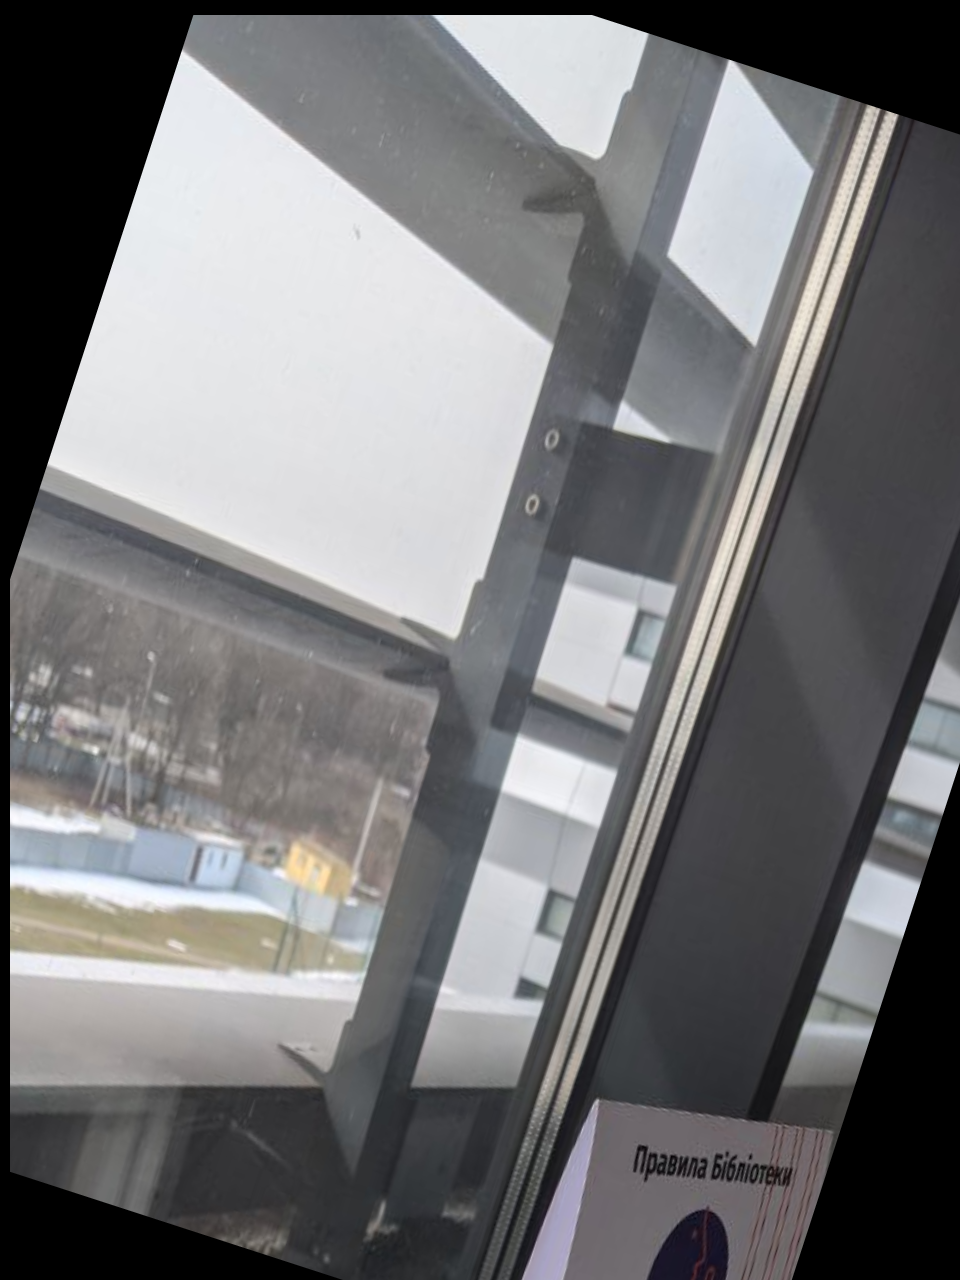

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


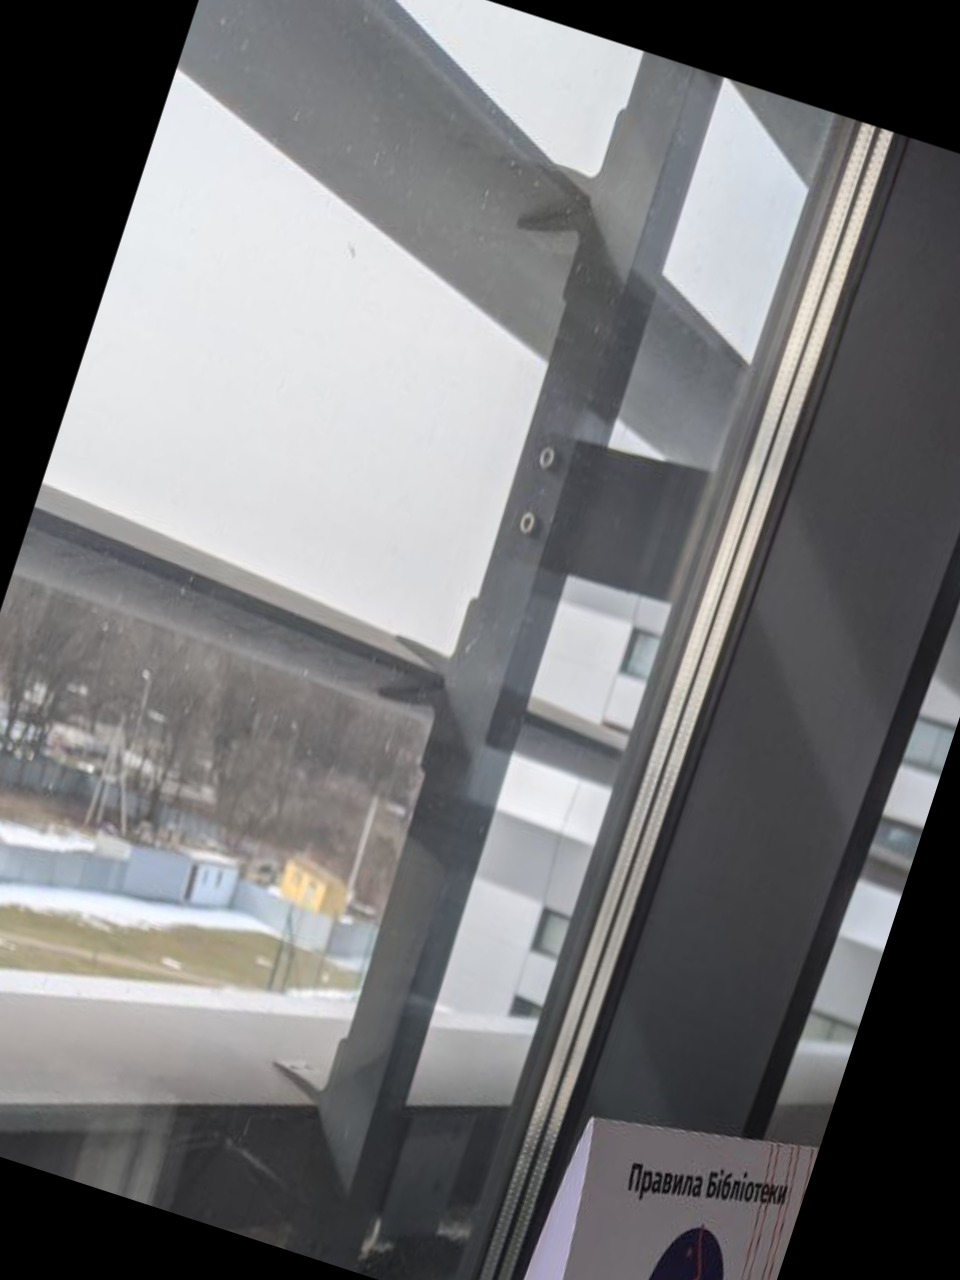

Are 2 images equal?  False


In [69]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####
rows, cols, channels = image2.shape
mtrx_scl = get_scaling_matrix(1.5, 2)
mtrx_rot = get_rotation_matrix(18, (cols//2, rows//2))
mtrx_trnsl = get_translation_matrix(10, 15)

x_need = float(image2.shape[1]/2)
y_need = float(image2.shape[0]/2)
transformed_img1 = cv.warpAffine(image2, np.column_stack((mtrx_scl, [0.0,0.0] )), (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
transformed_img1 = cv.warpAffine(transformed_img1, mtrx_rot, (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
transformed_img1 = cv.warpAffine(transformed_img1, mtrx_trnsl, (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
cv2_imshow(transformed_img1)
##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####
transformed_img2 = cv.warpAffine(image2, mtrx_trnsl, (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
transformed_img2 = cv.warpAffine(transformed_img2, np.column_stack((mtrx_scl, [0.0,0.0] )), (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
transformed_img2 = cv.warpAffine(transformed_img2, mtrx_rot, (cols,rows),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
cv2_imshow(transformed_img2)
##### YOUR CODE ENDS #####

print(f"Are 2 images equal?  {(transformed_img1 == transformed_img2).all()}")

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

As we can see, the outputs do not coincide( because we got 2 different sequences of transformations ).

Changing the order of transformations, it is possible to get the same results, but in most cases we will get different results, because usually composition of transformations is not commutative.

To get the same results, the transformations must commute with each other, meaning that the order of applying the transformations doesn't matter. One of the **general condition** is that almost every diagonal matrix commute. Also if the **product** of two **symmetric** matrices is **symmetric**, then they commute.

## Summary

To summarize everything you have learnt in this lab assignment, answer the questions below.

### What is a transformation matrix?

Transformation matrix is a matrix that transforms one vector into another vector.

<!-- If there is a linear transformation T ma -->
If there is a linear mapping $ T: \mathbb{R}^n \rightarrow \mathbb{R}^m $ and $\mathbb{x}$ is a column vector with $n$ entries, then \\
$$T(\mathbb{x}) = A\mathbb{x}, $$ where A is the $m×n$ transformation matrix.


### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

- How its shape and values affect the resulting image?

The shape specifies the type of transformation applied to the image, while the values, for example, determine the direction of the transformation( an easy example is that if you are changing the values in rotation matrix, then you will get different rotation angles ).

- What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

Typically, the transformation matrix is  $2\times3$ or $3\times3$.

\begin{align*}
\begin{pmatrix}
x_1\\
y_1 \\
1
\end{pmatrix}
&=
\begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
0& 0& 1
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}
\end{align*}
,where we shift our transformation by $a_{13}$ and $a_{23}$.

The last row in our transformation matrix ensures that the points after transformation are still on the same $z=1$ plane. We can ignore it, if we don't want to change perspective.


### What can be a result of composition of transformations?

A result of composition of transformations is also a transformation.

What is also important that
in the sequence $T_1 \circ T_2 \circ \ldots \circ T_n$, the transformations are applied in reverse order, starting with $T_n$, followed by $T_{n-1}$, and so forth, until $T_1$ is applied last. And, as mentioned above, usually composition of transformations is not commutative.





### What is a perspective shift transformation in terms of geometry?

A perspective shift transformation is a mapping points from one coordinate system to another.
We usually use it when we are projecting a pair of points from one plane onto another plane(as in task 2.1, for example).

